In [2]:
import pandas as pd

In [11]:
df = pd.read_csv("/Users/riteshkumar/Desktop/bigDataLab/dataset1.csv",skiprows=4)
print("Dataset loaded successfully.")

print(df.head())


Dataset loaded successfully.
   # Columns: time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  \
0                0      39.25       0.43      22.75       0.43      33.75   
1              250      39.25       0.43      23.00       0.00      33.00   
2              500      39.25       0.43      23.25       0.43      33.00   
3              750      39.50       0.50      23.00       0.71      33.00   
4             1000      39.50       0.50      24.00       0.00      33.00   

   var_rss23  
0        1.3  
1        0.0  
2        0.0  
3        0.0  
4        0.0  


In [12]:
import time

def simulate_streaming_data(data, delay=0.5):
    """
    Simulates streaming data by yielding one row at a time.
    Parameters:
        data (pd.DataFrame): The input dataset.
        delay (float): Time delay (in seconds) between each row emission.
    """
    for index, row in data.iterrows():
        print(f"\nStreaming row {index + 1} of {len(data)}:")
        print(row.to_dict())  # Display the row data as a dictionary
        yield row
        time.sleep(delay)  # Simulate delay between streams

# Simulate streaming the dataset
print("\nSimulating data stream...")
for streamed_row in simulate_streaming_data(df, delay=0.5):
    # Process the streamed row here (e.g., perform analysis or pass to a model)
    pass


Simulating data stream...

Streaming row 1 of 480:
{'# Columns: time': 0.0, 'avg_rss12': 39.25, 'var_rss12': 0.43, 'avg_rss13': 22.75, 'var_rss13': 0.43, 'avg_rss23': 33.75, 'var_rss23': 1.3}

Streaming row 2 of 480:
{'# Columns: time': 250.0, 'avg_rss12': 39.25, 'var_rss12': 0.43, 'avg_rss13': 23.0, 'var_rss13': 0.0, 'avg_rss23': 33.0, 'var_rss23': 0.0}

Streaming row 3 of 480:
{'# Columns: time': 500.0, 'avg_rss12': 39.25, 'var_rss12': 0.43, 'avg_rss13': 23.25, 'var_rss13': 0.43, 'avg_rss23': 33.0, 'var_rss23': 0.0}

Streaming row 4 of 480:
{'# Columns: time': 750.0, 'avg_rss12': 39.5, 'var_rss12': 0.5, 'avg_rss13': 23.0, 'var_rss13': 0.71, 'avg_rss23': 33.0, 'var_rss23': 0.0}

Streaming row 5 of 480:
{'# Columns: time': 1000.0, 'avg_rss12': 39.5, 'var_rss12': 0.5, 'avg_rss13': 24.0, 'var_rss13': 0.0, 'avg_rss23': 33.0, 'var_rss23': 0.0}

Streaming row 6 of 480:
{'# Columns: time': 1250.0, 'avg_rss12': 39.25, 'var_rss12': 0.43, 'avg_rss13': 24.0, 'var_rss13': 0.0, 'avg_rss23': 33.0,

In [13]:
import pandas as pd


def sliding_window(data, window_size, stride):
    """
    Generate sliding windows from the dataset.
    Parameters:
        data (pd.DataFrame): The dataset.
        window_size (int): The size of each window.
        stride (int): The step size to move the window.
    Returns:
        List of sliding windows as DataFrames.
    """
    windows = []
    for i in range(0, len(data) - window_size + 1, stride):
        windows.append(data.iloc[i:i + window_size])
    return windows

def tumbling_window(data, window_size):
    """
    Generate tumbling windows from the dataset.
    Parameters:
        data (pd.DataFrame): The dataset.
        window_size (int): The size of each window.
    Returns:
        List of tumbling windows as DataFrames.
    """
    windows = []
    for i in range(0, len(data), window_size):
        windows.append(data.iloc[i:i + window_size])
    return windows

# Parameters
window_size = 5
stride = 2

# Extract sliding windows
sliding_windows = sliding_window(df, window_size, stride)
print(f"Sliding Windows (window size={window_size}, stride={stride}):")
for i, window in enumerate(sliding_windows):
    print(f"\nWindow {i + 1}:\n{window}")

# Extract tumbling windows
tumbling_windows = tumbling_window(df, window_size)
print(f"\nTumbling Windows (window size={window_size}):")
for i, window in enumerate(tumbling_windows):
    print(f"\nWindow {i + 1}:\n{window}")

Sliding Windows (window size=5, stride=2):

Window 1:
   # Columns: time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  \
0                0      39.25       0.43      22.75       0.43      33.75   
1              250      39.25       0.43      23.00       0.00      33.00   
2              500      39.25       0.43      23.25       0.43      33.00   
3              750      39.50       0.50      23.00       0.71      33.00   
4             1000      39.50       0.50      24.00       0.00      33.00   

   var_rss23  
0        1.3  
1        0.0  
2        0.0  
3        0.0  
4        0.0  

Window 2:
   # Columns: time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  \
2              500      39.25       0.43      23.25       0.43       33.0   
3              750      39.50       0.50      23.00       0.71       33.0   
4             1000      39.50       0.50      24.00       0.00       33.0   
5             1250      39.25       0.43      24.00       0.00       33.0 

Window 1:
Cluster Labels: [2 0 0 1 1]

Cluster Centroids:
[[-0.35355339 -0.81649658 -0.81649658 -0.17437146 -0.35867682 -0.5
  -0.5       ]
 [ 1.06066017  1.22474487  1.22474487  0.69748583  0.14854292 -0.5
  -0.5       ]
 [-1.41421356 -0.81649658 -0.81649658 -1.04622875  0.42026779  2.
   2.        ]]

Inertia (within-cluster sum of squares): 7.893568487105188

Window 2:
Cluster Labels: [1 1 2 0 0]

Cluster Centroids:
[[ 1.06066017 -0.81649658 -0.81649658  0.80295507 -0.7783066   0.
   0.        ]
 [-1.06066017  0.20412415  0.20412415 -1.2044326   1.1674599   0.
   0.        ]
 [ 0.          1.22474487  1.22474487  0.80295507 -0.7783066   0.
   0.        ]]

Inertia (within-cluster sum of squares): 5.287931625231626

Window 3:
Cluster Labels: [2 2 2 1 0]

Cluster Centroids:
[[ 1.41421356  1.06904497  0.67862743  0.5        -0.5         0.
   0.        ]
 [ 0.70710678 -1.60356745 -1.97226098 -2.          2.          0.
   0.        ]
 [-0.70710678  0.17817416  0.43121118  0.5        -0

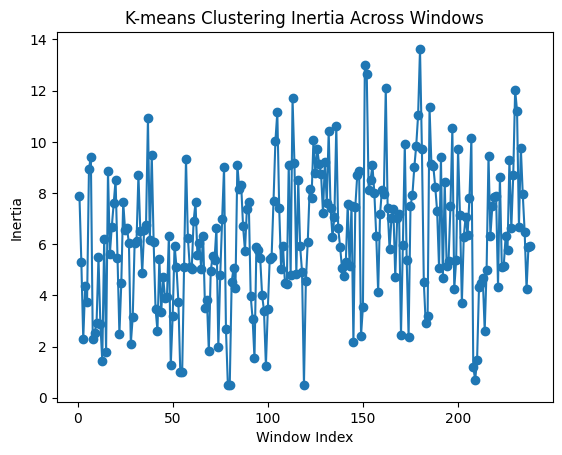

In [14]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Extract sliding windows (from the previous step)
def sliding_window(data, window_size, stride):
    windows = []
    for i in range(0, len(data) - window_size + 1, stride):
        windows.append(data.iloc[i:i + window_size])
    return windows

# Parameters
window_size = 5
stride = 2
sliding_windows = sliding_window(df, window_size, stride)

# Preprocess data (scaling for clustering)
scaler = StandardScaler()

# Perform clustering on each window
cluster_results = []
num_clusters = 3  # Number of clusters for k-means

for i, window in enumerate(sliding_windows):
    # Scale the data
    scaled_data = scaler.fit_transform(window)

    # Apply K-means
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
    kmeans.fit(scaled_data)

    # Store cluster labels and centroids
    cluster_results.append({
        "window_index": i,
        "labels": kmeans.labels_,
        "centroids": kmeans.cluster_centers_,
        "inertia": kmeans.inertia_  # Within-cluster sum of squares
    })

# Visualize clustering results
for result in cluster_results:
    print(f"Window {result['window_index'] + 1}:\nCluster Labels: {result['labels']}\n")
    print(f"Cluster Centroids:\n{result['centroids']}\n")
    print(f"Inertia (within-cluster sum of squares): {result['inertia']}\n")

# Visualize inertia (clustering performance across windows)
inertias = [result['inertia'] for result in cluster_results]
plt.plot(range(1, len(sliding_windows) + 1), inertias, marker='o')
plt.title("K-means Clustering Inertia Across Windows")
plt.xlabel("Window Index")
plt.ylabel("Inertia")
plt.show()

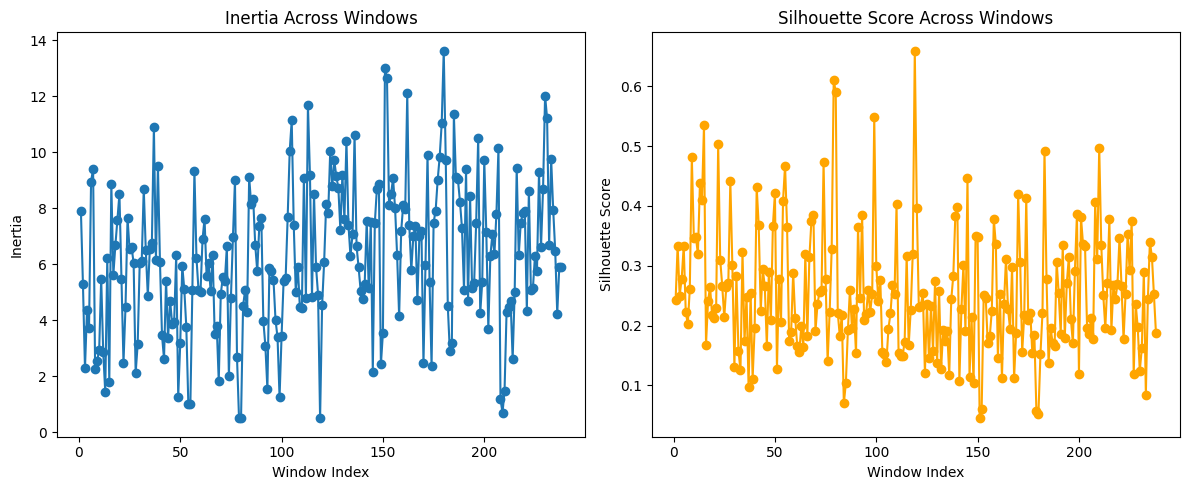

In [15]:
from sklearn.metrics import silhouette_score
import numpy as np

# Parameters
num_clusters = 3
silhouette_scores = []
inertias = []

# Perform clustering for different window sizes
for i, window in enumerate(sliding_windows):
    scaled_data = scaler.fit_transform(window)

    # Apply K-means
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
    kmeans.fit(scaled_data)

    # Calculate inertia and silhouette score
    inertias.append(kmeans.inertia_)
    if len(window) > 1:  # Silhouette score requires at least 2 data points per cluster
        score = silhouette_score(scaled_data, kmeans.labels_)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(np.nan)

# Plot inertia
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(sliding_windows) + 1), inertias, marker='o')
plt.title("Inertia Across Windows")
plt.xlabel("Window Index")
plt.ylabel("Inertia")

# Plot silhouette score
plt.subplot(1, 2, 2)
plt.plot(range(1, len(sliding_windows) + 1), silhouette_scores, marker='o', color='orange')
plt.title("Silhouette Score Across Windows")
plt.xlabel("Window Index")
plt.ylabel("Silhouette Score")

plt.tight_layout()
plt.show()